### Import existing model with a360ai MDK

In [1]:
a360ai

<A360 AI Interface for project: Product Demand Forecasting>

In [2]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'Product Demand Forecasting'

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import joblib
from matplotlib import pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Set Default Data Repo and load data

In [5]:
a360ai.set_default_datarepo(DATAREPO)

In [6]:
a360ai.list_datasets()

base_name extension        size
1                           X.csv       csv     97672.0
2                       X.parquet   parquet     20323.0
3  product-demand-2015-2020-a.csv       csv     44133.0
4                    rf_model.pkl       pkl  11465124.0
5                           y.csv       csv     10765.0
6                       y.parquet   parquet      5080.0

In [7]:
X = a360ai.load_dataset("X.csv")
y = a360ai.load_dataset("y.csv")

In [8]:
df_X_train = X.drop(X.index[list(range(1734, 1946))])
df_y_train = y['sales'][0:1734]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_X_train, df_y_train, test_size=0.15, random_state=0)

In [10]:
df_X_val = X.loc[1734:1824]
df_y_val = y['sales'][1734:1825]
df_X_val = df_X_val.reset_index(drop=True)
df_y_val = df_y_val.reset_index(drop=True)

In [11]:
df_X_covid = X.loc[1825:]
df_y_covid = y['sales'][1825:]
df_X_covid = df_X_covid.reset_index(drop=True)
df_y_covid = df_y_covid.reset_index(drop=True)

#### 2. Load existing model binary

In [11]:
rf = joblib.load("rf_model.pkl")

#### 3. Test a prediction to make sure the model works as expected

In [12]:
y_pred_val = rf.predict(df_X_val)

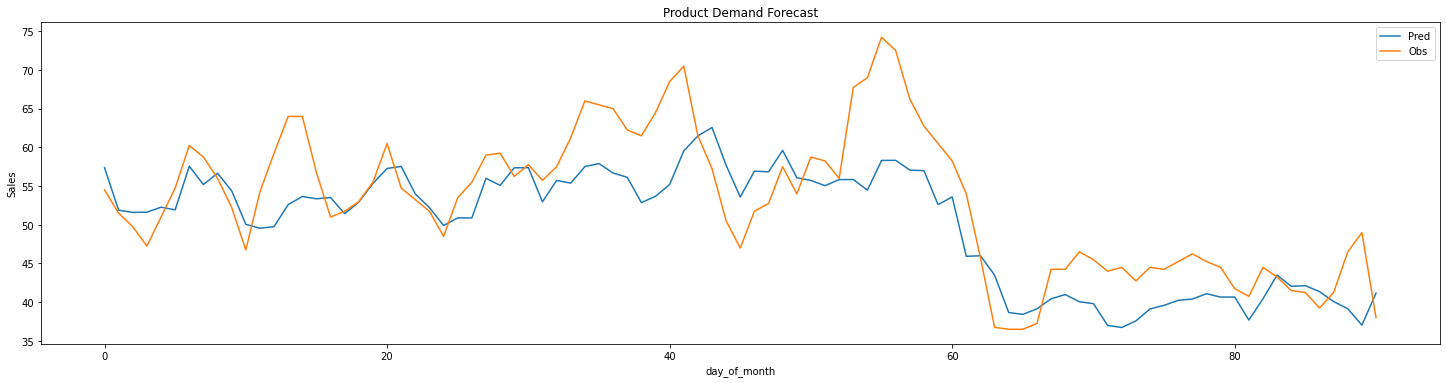

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
#ax.xaxis.set_major_locator(locator)
plt.plot(y_pred_val, label='Pred')
plt.plot(df_y_val, label='Obs')
plt.tight_layout()
plt.title('Product Demand Forecast')
plt.xlabel('day_of_month')
plt.ylabel("Sales")
plt.legend()
plt.show()

#### 4. Register model with A360 AI
- Register and import the existing model with a360ai MDK
- Check on `Models` in the platform left panel, if registered successfully, the specified `model_name` will show up 

In [14]:
imported_model = a360ai.import_model(
    model_name = "demand_rf_import_drift",
    experiment_name = "demand_rf_import_experiment_drift",
    model_artifact_object_in_memory = rf,
    model_flavor = "sklearn",
    model_type = "regression",
    enable_drift_monitoring=True,
    train_features=df_X_train,
    train_target=df_y_train,
    feature_names=list(X.columns)
)


//-- Experiment Loaded --//
Model Name: demand_rf_import_drift
Experiment Name: demand_rf_import_experiment_drift
Final Run Id: None
Model Flavor: sklearn
Input Signature: trend-index float, day_of_month big_integer, day_of_year big_integer, week_of_year big_integer, year big_integer, is_wknd big_integer, is_month_start big_integer, is_month_end big_integer, month_1 big_integer, month_2 big_integer, month_3 big_integer, month_4 big_integer, month_5 big_integer, month_6 big_integer, month_7 big_integer, month_8 big_integer, month_9 big_integer, month_10 big_integer, month_11 big_integer, month_12 big_integer
Output Signature: sales float
Data Exploration File: /home/jovyan/import_model.ipynb
Data Preparation File: /home/jovyan/import_model.ipynb
Model Training File: /home/jovyan/import_model.ipynb
Drift Monitoring Enabled: True

